# Часть 2. Подготовим из полученных данных тренировочный набор

Мы спарсили объявления с сайта auto.ru с помощью [скрипта](https://github.com/rzabolotin/autoru_parser).

В каталоге `train` лежит много csv файлов, и теперь нужно с ними поработать.


* Объединим их в один датасет
* Удалим дубликаты
* Приведем собранные данные в тот же формат, что и в тестовом наборе

In [1]:
import os
import pandas as pd

## Объединим данные в один набор

In [2]:
TRAIN_FOLDER_PATH = "train"

In [3]:
df_train = []
for file_name in os.listdir(TRAIN_FOLDER_PATH):
    df_train.append(pd.read_csv(os.path.join(TRAIN_FOLDER_PATH,file_name)))
df = pd.concat(df_train)

In [4]:
df.shape

(363387, 34)

Получили 363387 записей, это очень хорошо. Но посмотрим повнимательнее на сами данные.

## Посмотрим быстро, что мы имеем

In [5]:
df.head(3)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,location,equipment_dict,...,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price
0,Внедорожник 5 дв.,Volvo,https://auto.ru/cars/used/sale/volvo/xc90/1101...,0000CC,{'id': '0'},Продажа а/м осуществляется ОФИЦИАЛЬНЫМ ДИЛЕРОМ...,2.0 LTR,235 N12,Москва,"{'esp': True, 'airbag-driver': True, 'aux': Tr...",...,AUTOMATIC,EUROPEAN,2.0,NaN,ORIGINAL,ALL_WHEEL_DRIVE,LEFT,True,True,2799000
1,Седан,Volvo,https://auto.ru/cars/used/sale/volvo/s80/11013...,200204,{'id': '0'},При покупке автомобиля до 15 ноября \n► Выгод...,2.5 LTR,249 N12,Москва,"{'cruise-control': True, 'asr': True, 'tinted-...",...,AUTOMATIC,EUROPEAN,1.0,NaN,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,1277000
2,Внедорожник 5 дв.,Volvo,https://auto.ru/cars/new/sale/volvo/xc90/11009...,97948F,"{'id': '22148941', 'name': 'Momentum', 'availa...",Официальный дилер Volvo в Москве и Московской ...,2.0 LTR,249 N12,Москва,"{'multi-wheel': True, 'heated-wash-system': Tr...",...,AUTOMATIC,EUROPEAN,NaN,NaN,ORIGINAL,ALL_WHEEL_DRIVE,LEFT,True,True,4861200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363387 entries, 0 to 1849
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bodyType              363387 non-null  object 
 1   brand                 363387 non-null  object 
 2   car_url               363387 non-null  object 
 3   color                 363387 non-null  object 
 4   complectation_dict    363387 non-null  object 
 5   description           359623 non-null  object 
 6   engineDisplacement    363387 non-null  object 
 7   enginePower           363387 non-null  object 
 8   location              363387 non-null  object 
 9   equipment_dict        363387 non-null  object 
 10  fuelType              363387 non-null  object 
 11  image                 363387 non-null  object 
 12  mileage               363387 non-null  int64  
 13  modelDate             363387 non-null  int64  
 14  model_info            363387 non-null  object 
 15  mo

In [7]:
df.isna().sum()

bodyType                     0
brand                        0
car_url                      0
color                        0
complectation_dict           0
description               3764
engineDisplacement           0
enginePower                  0
location                     0
equipment_dict               0
fuelType                     0
image                        0
mileage                      0
modelDate                    0
model_info                   0
model_name                   0
name                         0
numberOfDoors                0
parsing_unixtime             0
priceCurrency                0
productionDate               0
sell_id                      0
super_gen                    0
vehicleConfiguration         0
vehicleTransmission          0
vendor                       0
Владельцы                73775
Владение                334627
ПТС                       2410
Привод                       0
Руль                         0
Состояние                    0
Таможня 

# Обрабатываем набор

In [8]:
def make_raw_train_data_like_test(df):
    """
    Функция преобразует спарсенные данные так, чтобы они были в таком же формате
    как и данные в тестовом наборе из соревнования kaggle
    """
    df.bodyType = df.bodyType.str.lower()\
                    .str.replace(' gran turismo','')\
                    .str.replace(' gran coupe','')\
                    .str.replace(' compact','')\
                    .str.replace(' roadster','')\
                    .str.replace(' single cab','')\
                    .str.replace(' lucida','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' regius','')\
                    .str.replace(' double cab','')\
                    .str.replace(' gran tourer','')\
                    .str.replace(' lwb','')\
                    .str.replace(' xl','')\
                    .str.replace(' sportback','')\
                    .str.replace(' type-s','')\
                    .str.replace(' us market','')\
                    .str.replace(' scout','')\
                    .str.replace(' emina','')\
                    .str.replace(' l2','')\
                    .str.replace(' crewmax','')\
                    .str.replace(' extralong','')\
                    .str.replace(' swb','')\
                    .str.replace(' pullman','')\
                    .str.replace(' extra','')\
                    .str.replace(' phv','')\
                    .str.replace(' l3','')\
                    .str.replace(' all-terrain','')\
                    .str.replace(' del sol','')\
                    .str.replace(' life maxi','')\
                    .str.replace(' 76','')\
                    .str.replace(' spada','')\
                    .str.replace(' lucida','')\
                    .str.replace(' gita','')\
                    .str.replace(' alltrack','')\
                    .str.replace(' blit','')\
                    .str.replace(' kasten','')\
                    .str.replace(' allspace','')\
                    .str.replace(' arctic trucks','')\
                    .str.replace(' 78','')\
                    .str.replace(' noah','')\
                    .str.replace(' l1','')\
                    .str.replace(' japan market','')\
                    .str.replace(' fielder','')\
                    .str.replace(' ardeo','')\
                    .str.replace(' 79','')\
                    .str.replace(' runx','')\
                    .str.replace(' gracia','')\
                    .str.replace(' asti','')\
                    .str.replace(' plus','')\
                    .str.replace(' marco polo','')\
                    .str.replace(' single cab','')\
                    .str.replace(' cross','')\
                    .str.replace(' gracia','')\
                    .str.replace(' liftback','')\
                    .str.replace(' xc','')\
                    .str.replace(' latio','')\
                    .str.replace(' spike','')\
                    .str.replace(' bed','')\
                    .str.replace(' 4x4','')\
                    .str.replace(' 120','')\
                    .str.replace(' regius','')\
                    .str.replace(' california','')\
                    .str.replace(' life','')\
                    .str.replace(' maxi','')\
                    .str.replace(' axio','')\
                    .str.replace(' gt','')\
                    .str.replace(' t150','')\
                    .str.replace(' spaceback','')\
                    .str.replace(' regular cab','')\
                    .str.replace(' cargo','')\
                    .str.replace(' long','')\
                    .str.replace(' l','')\
                    
    colors = {
    '040001':'чёрный',
    '0000CC':'синий',
    'FAFBFB':'белый',
    '97948F':'серый',
    'CACECB':'серый',
    '200204':'чёрный',
    'EE1D19':'красный',
    'FFC0CB':'розовый',
    'C49648':'золотистый',
    '22A0F8':'голубой',
    'FF8649':'оранжевый',
    '007F00':'зелёный',
    'DEA522':'золотистый',
    '660099':'фиолетовый',
    '4A2197':'фиолетовый',
    'FFD600':'жёлтый'
    }
    df.color = df.color.map(colors)
    
    fuelTypes = {
    'DIESEL':'дизель',
    'GASOLINE':'бензин',
    'LPG':'газ',
    'HYBRID':'гибрид',
    'ELECTRO':'электро',
    }
    df.fuelType = df.fuelType.map(fuelTypes)
    
    df.modelDate = df.modelDate.astype(float)
    
    df.numberOfDoors = df.numberOfDoors.astype(float)
    
    df.loc[df.brand=='Mercedes-Benz','brand'] = 'MERCEDES'
    df.brand = df.brand.str.upper()
    
    transmissionTypes = {
    'AUTOMATIC':'автоматическая',
    'MECHANICAL':'механическая',
    'ROBOT':'роботизированная',
    'VARIATOR':'вариатор'
    }
    df.vehicleTransmission = df.vehicleTransmission.map(transmissionTypes)
    
    pTypes = {
    'ALL_WHEEL_DRIVE':'полный',
    'REAR_DRIVE':'задний',
    'FORWARD_CONTROL':'передний',
    }
    df['Привод'] = df['Привод'].map(pTypes)
    
    pTypes = {
    'LEFT':'Левый',
    'RIGHT':'Правый',
    }
    df['Руль'] = df['Руль'].map(pTypes)
    
    pTypes = {
    True:'Не требует ремонта',
    }
    df['Состояние'] = df['Состояние'].map(pTypes)
    
    pTypes = {
    1:'1\xa0владелец',
    2:'2\xa0владельца',
    3:'3 или более',
    }
    df['Владельцы'] = df['Владельцы'].map(pTypes)
    
    pTypes = {
    'ORIGINAL':'Оригинал',
    'DUPLICATE':'Дубликат'
    }
    df['ПТС'] = df['ПТС'].map(pTypes)
    
    pTypes = {
    True:'Растаможен',
    }
    df['Таможня'] = df['Таможня'].map(pTypes)
    
    df.model_name = df.model_name.str.upper()
    
    

In [9]:
make_raw_train_data_like_test(df)

## Удалим дублирующиеся значения

In [10]:
df.drop_duplicates(['car_url'], inplace=True)
df.reset_index(inplace=True)

In [11]:
df.shape

(36210, 35)

После удаления дублей, осталось всего лишь **36210** записей.  Он почти соответствует размеру тестового набора (**34686**).  
Хотелось бы побольше, но будем работать с такими данными.  

## Анализирум колонки

### bodyType

In [12]:
df.bodyType.unique()

array(['внедорожник 5 дв.', 'седан', 'универсал 5 дв.', 'хэтчбек 5 дв.',
       'купе-хардтоп', 'купе', 'хэтчбек 3 дв.', 'лифтбек', 'кабриолет',
       'родстер', 'компактвэн', 'минивэн', 'внедорожник 3 дв.',
       'пикап двойная кабина', 'пикап одинарная кабина', 'седан 2 дв.',
       'микровэн', 'универсал 3 дв.1', 'седан-хардтоп',
       'внедорожник открытый', 'фургон', 'фастбек', 'лимузин',
       'пикап полуторная кабина', 'тарга'], dtype=object)

In [13]:
df.bodyType.nunique()

25

### brand

In [14]:
df.brand.value_counts()

VOLKSWAGEN    3769
MERCEDES      3738
BMW           3730
NISSAN        3621
TOYOTA        3517
AUDI          3457
SKODA         3422
MITSUBISHI    3389
VOLVO         2796
HONDA         1998
LEXUS         1553
INFINITI      1220
Name: brand, dtype: int64

### color

In [15]:
df.color.value_counts()

чёрный        12813
серый          8190
белый          7050
синий          3643
красный        1530
золотистый      891
зелёный         881
фиолетовый      420
голубой         417
жёлтый          203
оранжевый       163
розовый           9
Name: color, dtype: int64

### car_url

In [16]:
df.car_url.head()

0    https://auto.ru/cars/used/sale/volvo/xc90/1101...
1    https://auto.ru/cars/used/sale/volvo/s80/11013...
2    https://auto.ru/cars/new/sale/volvo/xc90/11009...
3    https://auto.ru/cars/used/sale/volvo/xc60/1100...
4    https://auto.ru/cars/used/sale/volvo/s60/11014...
Name: car_url, dtype: object

In [17]:
df.car_url.sample(1).values

array(['https://auto.ru/cars/used/sale/toyota/supra/1090441150-c98a70df/'],
      dtype=object)

### complectiaion_dict

In [18]:
df.complectation_dict.sample(1).values

array(["{'id': '0'}"], dtype=object)

### description

In [19]:
df.description.sample(1).values

array(['Торопитесь купить свой Skoda на условиях, которых больше не будет!\nНе упустите свой шанс! Звоните сейчас!\n\nРеальные автомобили с ПТС в наличии. \nЗаберите Ваш автомобиль за 3 часа!\n\nРОЛЬФ Витебский — официальный дилер Skoda в Санкт-Петербурге.\nКомпания РОЛЬФ основана в 1991 году и до сих пор является самым надежным дилером Skoda. Приобретая автомобиль в нашем ДЦ, Вы получаете полную безопасность и чистоту сделки, а также работу с компетентными специалистами.\n\n* В объявлении указаны актуальные цены с учетом всех дополнительных акций на покупку новых автомобилей Skoda в Ноябре.\n\nКомплектация Ambition\n\nОборудование\n-------------------------------------------------\n– 2 лампы для чтения спереди и сзади, 3-ий год гарантии\n- Защитные элементы на колесные арки\n- Зимний пакет (Многофункциональное 2-спицевое кожаное рулевое колесо с подогревом; задние сиденья с подогревом; обогрев лобового стекла)\n- Пакет ассистентов Traffic Jam assist (Адаптивный круиз-контроль (до 160 

### engineDisplacement

In [20]:
df.engineDisplacement.value_counts()

2.0 LTR    9648
1.6 LTR    4750
3.0 LTR    3615
1.8 LTR    2592
2.5 LTR    2337
1.4 LTR    2064
2.4 LTR    2062
3.5 LTR    1523
1.5 LTR     712
1.9 LTR     609
1.2 LTR     509
2.9 LTR     492
1.3 LTR     476
4.4 LTR     396
4.0 LTR     393
4.5 LTR     353
2.8 LTR     288
3.7 LTR     277
4.7 LTR     272
2.1 LTR     230
3.2 LTR     217
2.7 LTR     207
2.3 LTR     203
5.7 LTR     195
4.2 LTR     188
5.5 LTR     167
5.6 LTR     166
3.6 LTR     162
2.2 LTR     145
4.6 LTR     142
5.0 LTR     107
3.3 LTR      70
0.0 LTR      59
1.7 LTR      59
3.8 LTR      54
0.7 LTR      53
3.1 LTR      51
4.8 LTR      46
1.0 LTR      42
6.0 LTR      39
4.1 LTR      37
4.3 LTR      35
3.4 LTR      35
2.6 LTR      32
6.2 LTR      24
5.4 LTR      22
5.2 LTR      11
0.6 LTR       9
1.1 LTR       7
6.3 LTR       7
6.6 LTR       7
5.9 LTR       7
4.9 LTR       3
5.8 LTR       2
5.3 LTR       1
3.9 LTR       1
Name: engineDisplacement, dtype: int64

### enginePower

In [21]:
df.enginePower.value_counts()

249 N12    2701
150 N12    2560
110 N12    1258
190 N12    1091
140 N12    1039
           ... 
253 N12       1
127 N12       1
226 N12       1
196 N12       1
338 N12       1
Name: enginePower, Length: 318, dtype: int64

### location

In [22]:
df.location.value_counts()

Москва             23945
Санкт-Петербург     2991
Нижний Новгород      495
Химки                455
Воронеж              425
                   ...  
Кривцы                 1
Советский              1
Придорожный            1
Пречистое              1
Окуловка               1
Name: location, Length: 745, dtype: int64

### equipment_dict

In [23]:
df.equipment_dict.sample(1).values

array(["{'cruise-control': True, 'asr': True, 'tinted-glass': True, 'esp': True, 'airbag-driver': True, 'isofix': True, 'aux': True, 'usb': True, 'electro-window-front': True, 'light-sensor': True, 'multi-wheel': True, 'spare-wheel': True, 'passenger-seat-updown': True, 'airbag-passenger': True, 'computer': True, 'wheel-power': True, 'alarm': True, 'lock': True, 'rear-camera': True, 'fabric-seats': True, 'electro-window-back': True, 'airbag-rear-side': True, 'alloy-wheel-disks': True, 'rain-sensor': True, 'multizone-climate-control': True, 'airbag-side': True, 'voice-recognition': True, 'mirrors-heat': True, 'dark-interior': True, 'audiosystem-cd': True, 'rear-seats-heat': True, 'abs': True, 'front-seats-heat': True, 'power-child-locks-rear-doors': True, 'bluetooth': True, 'wheel-configuration2': True, 'wheel-configuration1': True, 'park-assist-r': True, '12v-socket': True, 'third-rear-headrest': True}"],
      dtype=object)

### fuelType

In [24]:
df.fuelType.value_counts()

бензин     29429
дизель      6411
гибрид       306
электро       59
газ            5
Name: fuelType, dtype: int64

In [25]:
df.fuelType.value_counts()

бензин     29429
дизель      6411
гибрид       306
электро       59
газ            5
Name: fuelType, dtype: int64

### image

In [26]:
df.image.iloc[0]

'//avatars.mds.yandex.net/get-autoru-vos/2092864/1e853bed0c81cdf5f57d0447b696ba17/small'

### mileage

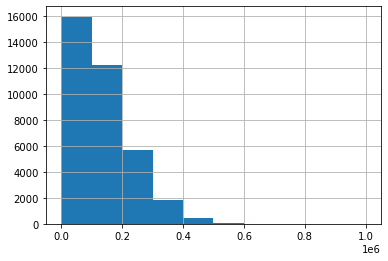

In [27]:
df.mileage.hist();

### modelDate             

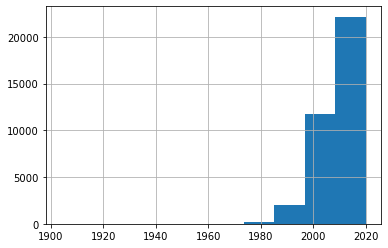

In [28]:
df.modelDate.hist();

### model_name

In [29]:
df.model_name.value_counts()

OCTAVIA      1417
OUTLANDER    1060
X-TRAIL       818
POLO          733
3 СЕРИИ       720
             ... 
Z1              1
BASSARA         1
LC              1
SLC             1
LIBERO          1
Name: model_name, Length: 537, dtype: int64

### name

In [30]:
df.name

0                2.0d AT (235 л.с.) 4WD
1                     2.5 AT (249 л.с.)
2                 2.0 AT (249 л.с.) 4WD
3                2.4d AT (190 л.с.) 4WD
4                     2.4 AT (170 л.с.)
                      ...              
36205           3.0d AMT (245 л.с.) 4WD
36206    45 TFSI 2.0 AMT (245 л.с.) 4WD
36207            3.0 AMT (300 л.с.) 4WD
36208            2.0 AMT (211 л.с.) 4WD
36209            2.4d AT (215 л.с.) 4WD
Name: name, Length: 36210, dtype: object

### numberOfDoors         

In [31]:
df.numberOfDoors.value_counts()

5.0    22449
4.0    12263
2.0      961
3.0      536
0.0        1
Name: numberOfDoors, dtype: int64

### parsing_unixtime

<AxesSubplot:>

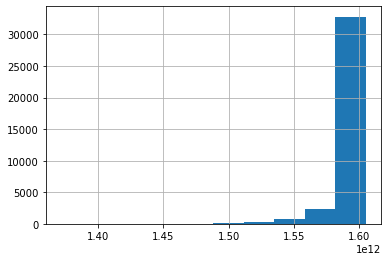

In [32]:
df.parsing_unixtime.hist()

### priceCurrency

In [33]:
df.priceCurrency.value_counts()

RUR    36210
Name: priceCurrency, dtype: int64

### productionDate

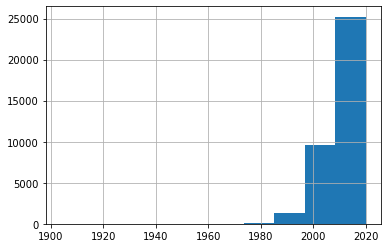

In [34]:
df.productionDate.hist();

### sell_id

In [35]:
df.sell_id

0        1101191623-464cf4be
1        1101345022-3e0e4f8c
2        1100911068-4dd8f660
3        1100336634-a6643416
4        1101497967-8c590a51
                ...         
36205    1062506820-c3420f81
36206    1101491025-4b8ebe4d
36207    1100159814-dbcfcde7
36208    1101243826-9f0938e2
36209    1101393051-9b4122a2
Name: sell_id, Length: 36210, dtype: object

### vehicleConfiguration

In [36]:
df.vehicleConfiguration.value_counts()

ALLROAD_5_DOORS AUTOMATIC 2.0      2314
ALLROAD_5_DOORS AUTOMATIC 3.0      2268
ALLROAD_5_DOORS VARIATOR 2.0       2234
SEDAN AUTOMATIC 2.0                1607
SEDAN MECHANICAL 1.6                992
                                   ... 
ALLROAD_3_DOORS MECHANICAL 2.0        1
COUPE VARIATOR 2.5                    1
MINIVAN MECHANICAL 1.6                1
HATCHBACK_5_DOORS AUTOMATIC 1.7       1
HATCHBACK_5_DOORS ROBOT 1.9           1
Name: vehicleConfiguration, Length: 619, dtype: int64

### vehicleTransmission

In [37]:
df.vehicleTransmission.value_counts()

автоматическая      19626
механическая         6885
роботизированная     4866
вариатор             4833
Name: vehicleTransmission, dtype: int64

In [38]:
df.vehicleTransmission.value_counts()

автоматическая      19626
механическая         6885
роботизированная     4866
вариатор             4833
Name: vehicleTransmission, dtype: int64

### vendor

In [39]:
df.vendor.value_counts()

EUROPEAN    20912
JAPANESE    15298
Name: vendor, dtype: int64

### Другое

In [40]:
df['Привод'].value_counts()

полный      18274
передний    15172
задний       2764
Name: Привод, dtype: int64

In [41]:
df['Руль'].value_counts()

Левый     35040
Правый     1170
Name: Руль, dtype: int64

In [42]:
df['Состояние'].value_counts()

Не требует ремонта    36210
Name: Состояние, dtype: int64

In [43]:
df['Владельцы'].value_counts()

3 или более    13121
1 владелец      8738
2 владельца     7731
Name: Владельцы, dtype: int64

In [44]:
df['ПТС'].value_counts()

Оригинал    31996
Дубликат     4055
Name: ПТС, dtype: int64

In [45]:
df['Таможня'].value_counts()

Растаможен    36210
Name: Таможня, dtype: int64

In [46]:
df['Владение'].value_counts() 

{'year': 2018, 'month': 12}    164
{'year': 2019, 'month': 8}     156
{'year': 2018, 'month': 11}    152
{'year': 2019, 'month': 10}    147
{'year': 2018, 'month': 10}    142
                              ... 
{'year': 1991, 'month': 11}      1
{'year': 2000, 'month': 5}       1
{'year': 1997, 'month': 1}       1
{'year': 2002, 'month': 5}       1
{'year': 1996, 'month': 7}       1
Name: Владение, Length: 263, dtype: int64

### Дополнительные колонки

#### description

In [47]:
df.description

0        Продажа а/м осуществляется ОФИЦИАЛЬНЫМ ДИЛЕРОМ...
1        При покупке автомобиля до 15 ноября  \n► Выгод...
2        Официальный дилер Volvo в Москве и Московской ...
3        Автодилер года 2020\n\nПобедитель в номинации ...
4        Объявление №690\n\nАвтомобиль в отличном состо...
                               ...                        
36205       Машина идеальном состоянии не бити не крашеный
36206    Мы ждем Вашего звонка, чтобы предложить лучшие...
36207    Продаётся идеальный автомобиль, весь в родном ...
36208    Масло не ест. Мотор после ремонта ( пробег пос...
36209    Автомобиль приобретался у официального дилера ...
Name: description, Length: 36210, dtype: object

In [48]:
df.complectation_dict

0                                              {'id': '0'}
1                                              {'id': '0'}
2        {'id': '22148941', 'name': 'Momentum', 'availa...
3                                              {'id': '0'}
4                                              {'id': '0'}
                               ...                        
36205                                          {'id': '0'}
36206    {'id': '21594143', 'name': '45 TFSI quattro S ...
36207                                          {'id': '0'}
36208                                          {'id': '0'}
36209                                          {'id': '0'}
Name: complectation_dict, Length: 36210, dtype: object

In [49]:
df.equipment_dict

0        {'esp': True, 'airbag-driver': True, 'aux': Tr...
1        {'cruise-control': True, 'asr': True, 'tinted-...
2        {'multi-wheel': True, 'heated-wash-system': Tr...
3        {'cruise-control': True, 'engine-proof': True,...
4        {'engine-proof': True, 'cruise-control': True,...
                               ...                        
36205                                                   {}
36206    {'cruise-control': True, 'asr': True, 'esp': T...
36207                                                   {}
36208    {'cruise-control': True, 'asr': True, 'tinted-...
36209    {'cruise-control': True, 'asr': True, 'tinted-...
Name: equipment_dict, Length: 36210, dtype: object

In [50]:
df.model_info

0        {'code': 'XC90', 'name': 'XC90', 'ru_name': 'X...
1        {'code': 'S80', 'name': 'S80', 'ru_name': 'S80...
2        {'code': 'XC90', 'name': 'XC90', 'ru_name': 'X...
3        {'code': 'XC60', 'name': 'XC60', 'ru_name': 'X...
4        {'code': 'S60', 'name': 'S60', 'ru_name': 'S60...
                               ...                        
36205    {'code': 'A7', 'name': 'A7', 'ru_name': 'А7', ...
36206    {'code': 'A6', 'name': 'A6', 'ru_name': 'А6', ...
36207    {'code': 'A7', 'name': 'A7', 'ru_name': 'А7', ...
36208    {'code': 'A4_ALLROAD', 'name': 'A4 allroad', '...
36209    {'code': 'XC70', 'name': 'XC70', 'ru_name': 'X...
Name: model_info, Length: 36210, dtype: object

In [51]:
df.super_gen

0        {'id': '20228874', 'name': 'II', 'ru_name': '2...
1        {'id': '7974165', 'name': 'II Рестайлинг', 'ru...
2        {'id': '21552979', 'name': 'II Рестайлинг', 'r...
3        {'id': '20012324', 'name': 'I Рестайлинг', 'ru...
4        {'id': '2309989', 'name': 'I Рестайлинг', 'ru_...
                               ...                        
36205    {'id': '20183736', 'name': 'I (4G) Рестайлинг'...
36206    {'id': '21210593', 'name': 'V (C8)', 'ru_name'...
36207    {'id': '6457121', 'name': 'I (4G)', 'ru_name':...
36208    {'id': '7754720', 'name': 'IV (B8) Рестайлинг'...
36209    {'id': '20012920', 'name': 'II Рестайлинг', 'r...
Name: super_gen, Length: 36210, dtype: object

## Сохраним обработанный тренировочный набор в файл

In [52]:
df.to_csv('train.csv')

# Выводы

* Я собрал тренировочный набор, соответствующий формату тестового набора
* Количество записей в тренировочном и в тестовом наборе примерно совпадают (что не очень хорошо, по идее нужно хотя бы в 3 раза больше данных в трейне чем в тесте)

# Дальнейшие шаги

* Сделаем предопработку данных (на трейне и тесте вместе) и обучим простую модель